In [1]:
#importing the library you will be using 

import pandas as pd
import numpy as np
import os
import glob

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:


def read_taxi_data():
    uber_directory = "/home/elvis/Documents/uber-pickups-in-new-york-city/2014" #loading folder containing dataset
    file_type = 'csv'
    seperator =','
    uber_2014 = pd.concat([pd.read_csv(f, sep=seperator,parse_dates= ["Date/Time"]) for f in 
                           glob.glob(uber_directory + "/*."+file_type)],ignore_index=True)
    
    #converts dataframe to HDF5 format and stores it in a file
    uber_2014.to_hdf('2014_data.h5', key='uber_2014', mode='w')

    return uber_2014

In [3]:
#run the function above
uber_2014 = read_taxi_data()
uber_2014.head()



,Date/Time,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


In [4]:
uber_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 138.4+ MB


In [5]:
#finding out if there are any null values
uber_2014.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

 Lets start by breaking down the datetime feature into a date, month, week , day and hour features 

In [6]:
# Function for Expanding DateTime to separate columns taht can be used for other data

def expand_date(df):    
    df['date'] = df['Date/Time'].dt.date
    df['month'] = df['Date/Time'].dt.month
    df['week'] = df['Date/Time'].dt.week
    df['MonthDayNum'] = df['Date/Time'].dt.day
    df['HourOfDay'] = df['Date/Time'].dt.hour
    df['DayOfWeekNum'] = df['Date/Time'].dt.dayofweek #Monday=0, Sunday=6.
    df['DayOfWeek'] = df['Date/Time'].dt.day_name()
    
    return df

In [7]:
expand_date(uber_2014)
uber_2014.head()

,Date/Time,Lat,Lon,Base,date,month,week,MonthDayNum,HourOfDay,DayOfWeekNum,DayOfWeek
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,2014-08-01,8,31,1,0,4,Friday
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,2014-08-01,8,31,1,0,4,Friday
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,2014-08-01,8,31,1,0,4,Friday
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,2014-08-01,8,31,1,0,4,Friday
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,2014-08-01,8,31,1,0,4,Friday


In [8]:
uber_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date/Time     datetime64[ns]
 1   Lat           float64       
 2   Lon           float64       
 3   Base          object        
 4   date          object        
 5   month         int64         
 6   week          int64         
 7   MonthDayNum   int64         
 8   HourOfDay     int64         
 9   DayOfWeekNum  int64         
 10  DayOfWeek     object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 380.5+ MB


on running the info() we realize that there are now 10 columns

In [9]:
#how you can use vaex
import vaex as vx


In [11]:
uber_data = vx.from_pandas(uber_2014)

In [12]:
uber_data.export_hdf5('uber_data.hdf5')

ERROR:MainThread:root:error creating dataset for 'date', with type dtype('O') 
Traceback (most recent call last):
  File "/home/elvis/anaconda3/envs/data-science/lib/python3.7/site-packages/vaex/hdf5/export.py", line 201, in export_hdf5
    array = h5column_output.require_dataset('data', shape=shape, dtype=dtype.newbyteorder(byteorder))
  File "/home/elvis/anaconda3/envs/data-science/lib/python3.7/site-packages/h5py/_hl/group.py", line 191, in require_dataset
    return self.create_dataset(name, *(shape, dtype), **kwds)
  File "/home/elvis/anaconda3/envs/data-science/lib/python3.7/site-packages/h5py/_hl/group.py", line 136, in create_dataset
    dsid = dataset.make_new_dset(self, shape, dtype, data, **kwds)
  File "/home/elvis/anaconda3/envs/data-science/lib/python3.7/site-packages/h5py/_hl/dataset.py", line 118, in make_new_dset
    tid = h5t.py_create(dtype, logical=1)
  File "h5py/h5t.pyx", line 1634, in h5py.h5t.py_create
  File "h5py/h5t.pyx", line 1656, in h5py.h5t.py_create
  Fi

In [13]:
uber_data = vx.open('uber_data.hdf5')

In [14]:
uber_data.head()

#,Date_Time,Lat,Lon,Base,month,week,MonthDayNum,HourOfDay,DayOfWeekNum,DayOfWeek,index
<i style='opacity: 0.6'>0</i>,2014-08-01 00:03:00.000000000,40.7366,-73.9906,B02512,8,31,1,0,4,Friday,0
<i style='opacity: 0.6'>1</i>,2014-08-01 00:09:00.000000000,40.726,-73.9918,B02512,8,31,1,0,4,Friday,1
<i style='opacity: 0.6'>2</i>,2014-08-01 00:12:00.000000000,40.7209,-74.0507,B02512,8,31,1,0,4,Friday,2
<i style='opacity: 0.6'>3</i>,2014-08-01 00:12:00.000000000,40.7387,-73.9856,B02512,8,31,1,0,4,Friday,3
<i style='opacity: 0.6'>4</i>,2014-08-01 00:12:00.000000000,40.7323,-74.0077,B02512,8,31,1,0,4,Friday,4
<i style='opacity: 0.6'>5</i>,2014-08-01 00:13:00.000000000,40.7349,-74.0033,B02512,8,31,1,0,4,Friday,5
<i style='opacity: 0.6'>6</i>,2014-08-01 00:15:00.000000000,40.7279,-73.9542,B02512,8,31,1,0,4,Friday,6
<i style='opacity: 0.6'>7</i>,2014-08-01 00:17:00.000000000,40.721,-73.9937,B02512,8,31,1,0,4,Friday,7
<i style='opacity: 0.6'>8</i>,2014-08-01 00:19:00.000000000,40.7195,-74.006,B02512,8,31,1,0,4,Friday,8
<i style='opacity: 0.6'>9</i>,2014-08-01 00:20:00.000000000,40.7448,-73.9799,B02512,8,31,1,0,4,Friday,9


In [15]:
uber_data.info()

column,type,unit,description,expression
Date_Time,datetime64[ns],,,
Lat,float64,,,
Lon,float64,,,
Base,str,,,
month,int64,,,
week,int64,,,
MonthDayNum,int64,,,
HourOfDay,int64,,,
DayOfWeekNum,int64,,,
DayOfWeek,str,,,


In [16]:
uber_2014.isnull().sum()

Date/Time       0
Lat             0
Lon             0
Base            0
date            0
month           0
week            0
MonthDayNum     0
HourOfDay       0
DayOfWeekNum    0
DayOfWeek       0
dtype: int64

# DATA ANALYSIS

# 1. Uber pickup and disribution in NYC

1. First, lets explore the pickups per month and find out if there was an increase or a decrease

In [17]:
#trying to find the number of months. There are 6 of them (april-sep)
uber_data.month.unique().tolist()

[6, 7, 4, 5, 8, 9]

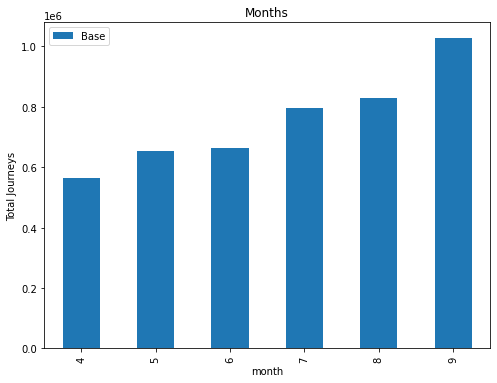

In [18]:
monthly_uber_rides = uber_2014.pivot_table(index=['month'],
                                  values='Base',
                                  aggfunc='count')
monthly_uber_rides.plot(kind='bar',figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Months');

from the plot above, we can see that there is an increase every month of hailed rides(total journeys ratio = 1*10^6)

2. Lets find out which days had more journeys than other days over the 6 months

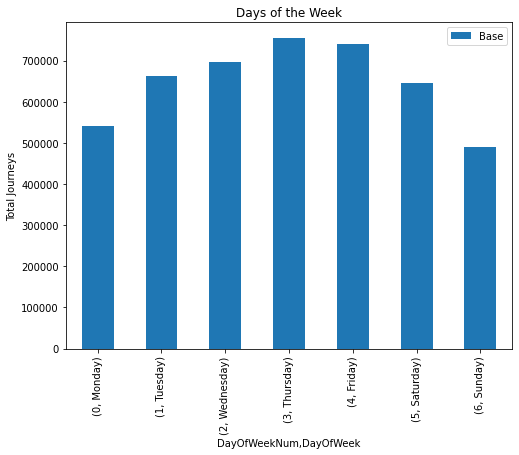

In [19]:
daily_uber_rides = uber_2014.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
daily_uber_rides.plot(kind='bar',figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Days of the Week');

Interestingly, there were more rides on Thursday! Friday closely followed. Its also interesting that there were more rides on even wednesday and tuesday than on saturdays!

In [20]:
## groupby operation
daily_uber_rides_month = uber_2014.groupby(['month','DayOfWeekNum','DayOfWeek'])['Base'].count()
daily_uber_rides_month = daily_uber_rides_month.reset_index()
daily_uber_rides_month.head()

,month,DayOfWeekNum,DayOfWeek,Base
0,4,0,Monday,60861
1,4,1,Tuesday,91185
2,4,2,Wednesday,108631
3,4,3,Thursday,85067
4,4,4,Friday,90303


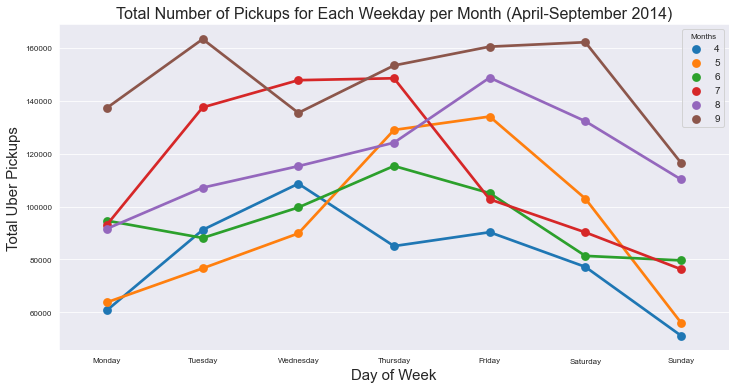

In [21]:
## create figure
fig = plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

ax = sns.pointplot(x="DayOfWeek", y="Base", hue="month", data=daily_uber_rides_month)
handles,labels = ax.get_legend_handles_labels()

# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Day of Week', fontsize = 15)
ax.set_ylabel('Total Uber Pickups', fontsize = 15)
ax.set_title('Total Number of Pickups for Each Weekday per Month (April-September 2014)', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc=0, title="Months", prop={'size':10})
ax.get_legend().get_title().set_fontsize('8')
plt.show()

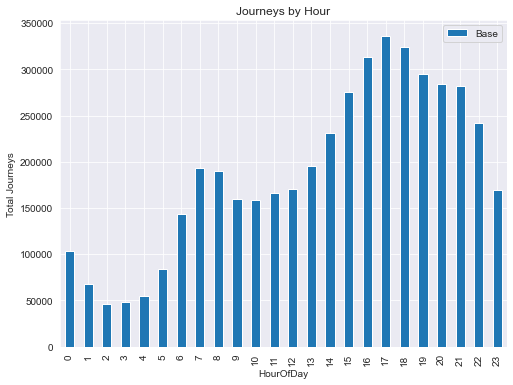

In [22]:
uber_hour = uber_2014.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

In [23]:
## groupby operation
hourly_ride_data = uber_2014.groupby(['month','DayOfWeekNum','HourOfDay','DayOfWeek'])['Base'].count()

## reset index
hourly_ride_data = hourly_ride_data.reset_index()

## rename column
hourly_ride_data = hourly_ride_data.rename(columns = {'Base':'RideCount'})

## ocular analysis
hourly_ride_data.head()

,month,DayOfWeekNum,HourOfDay,DayOfWeek,RideCount
0,4,0,0,Monday,518
1,4,0,1,Monday,261
2,4,0,2,Monday,238
3,4,0,3,Monday,571
4,4,0,4,Monday,1021


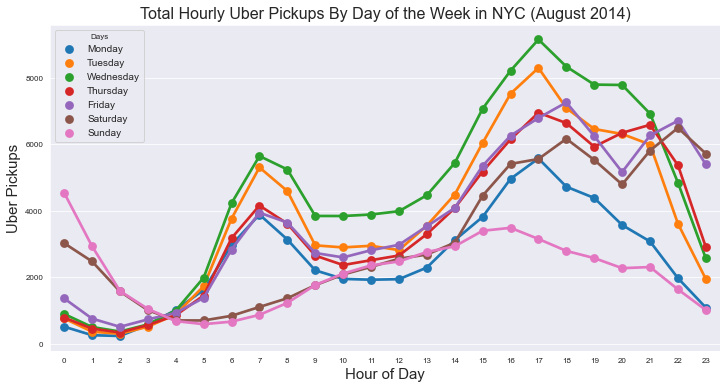

In [24]:
#first, create dataframe containing august hourly data
aug_hourly_data = hourly_ride_data[hourly_ride_data.month == 4]

## create figure
fig = plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

ax = sns.pointplot(x="HourOfDay", y="RideCount", hue="DayOfWeek", data=aug_hourly_data)
handles,labels = ax.get_legend_handles_labels()

# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Hour of Day', fontsize = 15)
ax.set_ylabel('Uber Pickups', fontsize = 15)
ax.set_title('Total Hourly Uber Pickups By Day of the Week in NYC (August 2014)', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc=0, title="Days", prop={'size':10})
ax.get_legend().get_title().set_fontsize('8')
plt.show()

In [25]:
## groupby operation
weekday_hourly_avg = hourly_ride_data.groupby(['DayOfWeek','HourOfDay'])['RideCount'].mean()

## reset index
weekday_hourly_avg = weekday_hourly_avg.reset_index()

## rename column
weekday_hourly_avg = weekday_hourly_avg.rename(columns = {'RideCount':'AverageRides'})

## sort by categorical index
weekday_hourly_avg = weekday_hourly_avg.sort_index()

## ocular analysis
weekday_hourly_avg.head()

,DayOfWeek,HourOfDay,AverageRides
0,Friday,0,2286.000000
1,Friday,1,1360.500000
2,Friday,2,891.666667
3,Friday,3,1155.000000
4,Friday,4,1467.666667


In [26]:
weekday_hourly_avg.DayOfWeek.value_counts()

Tuesday      24
Monday       24
Thursday     24
Sunday       24
Saturday     24
Wednesday    24
Friday       24
Name: DayOfWeek, dtype: int64

In [27]:
#convert AverageRides column from float to int
weekday_hourly_avg['AverageRides'] = weekday_hourly_avg['AverageRides'].astype('int')
weekday_hourly_avg['AverageRides'].dtypes

dtype('int64')

In [28]:
weekday_hourly_avg.head()

,DayOfWeek,HourOfDay,AverageRides
0,Friday,0,2286
1,Friday,1,1360
2,Friday,2,891
3,Friday,3,1155
4,Friday,4,1467


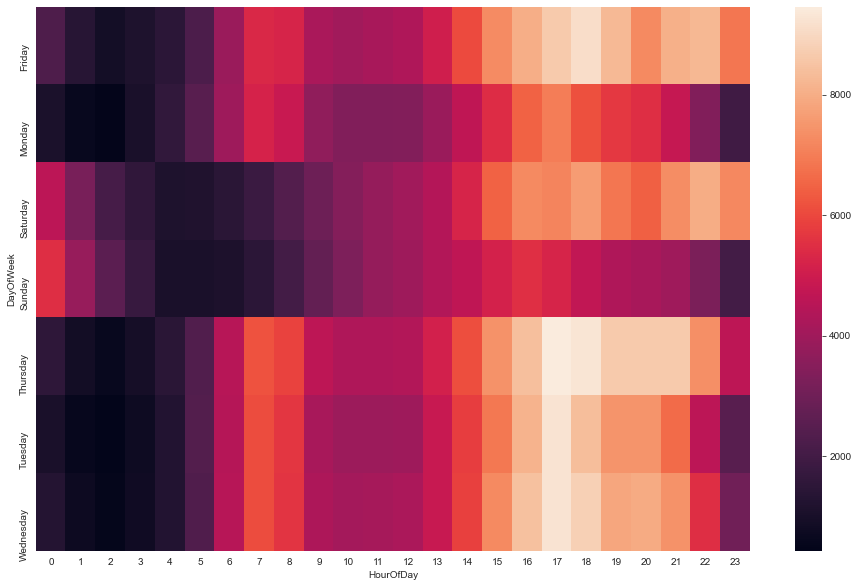

In [29]:
heatmap1_data = pd.pivot_table(weekday_hourly_avg, values='AverageRides',
                     index=['DayOfWeek'], 
                     columns='HourOfDay')
plt.figure(figsize=(16,10))
sns.heatmap(heatmap1_data)

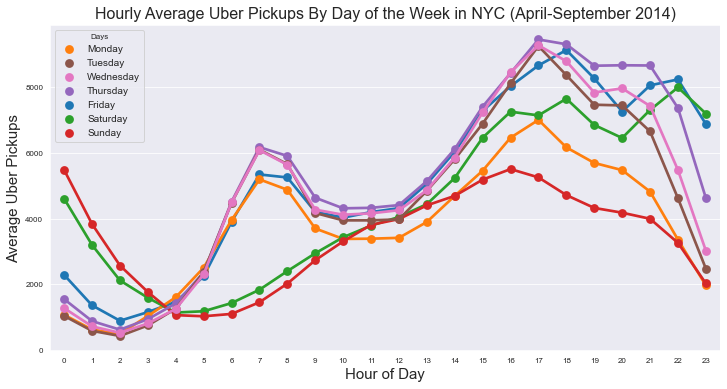

In [30]:
## create figure
fig = plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

ax = sns.pointplot(x="HourOfDay", y="AverageRides", hue="DayOfWeek", data=weekday_hourly_avg)
handles,labels = ax.get_legend_handles_labels()

#reordering legend content
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]]
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]

# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Hour of Day', fontsize = 15)
ax.set_ylabel('Average Uber Pickups', fontsize = 15)
ax.set_title('Hourly Average Uber Pickups By Day of the Week in NYC (April-September 2014)', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc=0, title="Days", prop={'size':10})
ax.get_legend().get_title().set_fontsize('8')
plt.show()

In [31]:
uber_2014.Base.value_counts()

B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: Base, dtype: int64

In [32]:
base_names = {"Base": {'B02617':'Weiter', 'B02598':'Hinter','B02682':'Schmecken','B02764':'Danach-NY','B02512':'Unter'}}

uber_2014_bases = uber_2014.copy()

uber_2014_bases.replace(base_names, inplace=True)

uber_2014_bases.head()

,Date/Time,Lat,Lon,Base,date,month,week,MonthDayNum,HourOfDay,DayOfWeekNum,DayOfWeek
0,2014-08-01 00:03:00,40.7366,-73.9906,Unter,2014-08-01,8,31,1,0,4,Friday
1,2014-08-01 00:09:00,40.7260,-73.9918,Unter,2014-08-01,8,31,1,0,4,Friday
2,2014-08-01 00:12:00,40.7209,-74.0507,Unter,2014-08-01,8,31,1,0,4,Friday
3,2014-08-01 00:12:00,40.7387,-73.9856,Unter,2014-08-01,8,31,1,0,4,Friday
4,2014-08-01 00:12:00,40.7323,-74.0077,Unter,2014-08-01,8,31,1,0,4,Friday


In [ ]:
import plotly.express as px

# Here we use a column with categorical data
fig = px.histogram(uber_2014_bases, x="Base",
                  title='Pickups Per Base',
                   labels={'count':'No of Pickups'})
fig.show()



In [34]:
from mpl_toolkits.basemap import Basemap

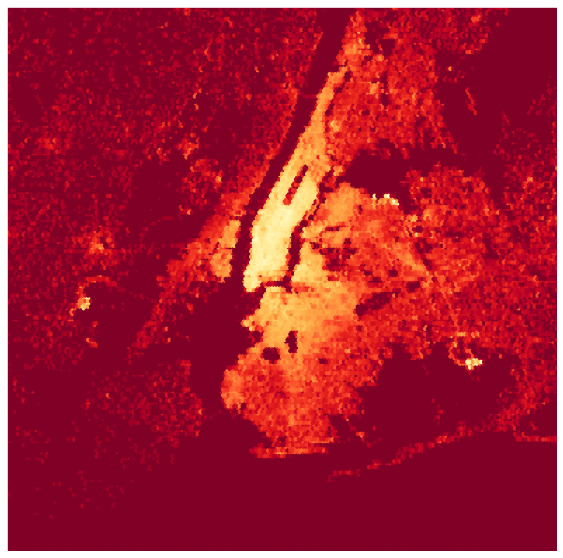

In [35]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(uber_2014['Lon'].values, uber_2014['Lat'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r);

In [36]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [37]:
#Most of this code is from Geoff Boeing article. 
#If you get lost, read through it and it will explain way better than I could ever do!
#https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/

def get_hot_spots(max_distance,min_cars,ride_data):
    
    ## get coordinates from ride data
    coords = ride_data[['Lat', 'Lon']].to_numpy()
    
    ## calculate epsilon parameter using
    ## the user defined distance
    kms_per_radian = 6371.0088
    ##The epsilon parameter is the max distance that points can be from each other to be considered a cluster.
    epsilon = max_distance / kms_per_radian
    
    ## perform clustering
    db = DBSCAN(eps=epsilon, min_samples=min_cars,
                algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    
    ## group the clusters
    cluster_labels = db.labels_
    num_clusters = len(set(cluster_labels))
    clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
    
    ## report
    print('Number of clusters: {}'.format(num_clusters))
    
    ## initialize lists for hot spots
    lat = []
    lon = []
    num_members = []
    
    ## loop through clusters and get centroids, number of members
    for ii in range(len(clusters)):

        ## filter empty clusters
        if clusters[ii].any():

            ## get centroid and magnitude of cluster
            lat.append(MultiPoint(clusters[ii]).centroid.x)
            lon.append(MultiPoint(clusters[ii]).centroid.y)
            num_members.append(len(clusters[ii]))
            
    hot_spots = [lon,lat,num_members]
    
    return hot_spots


In [38]:
## get ride data
ride_data = uber_2014_bases.loc[(uber_2014_bases['MonthDayNum']== 21) & (uber_2014_bases['HourOfDay'] > 15)]

## maximum distance between two cluster members in kilometers
max_distance = 0.05

## minimum number of cluster members
min_pickups = 25

## call the get_hot_spots function
hot_spots = get_hot_spots(max_distance ,min_pickups, ride_data)

Number of clusters: 172


In [39]:
import mplleaflet
## make the figure
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

## set the color scale
color_scale = np.log(hot_spots[2])
# color_scale = hot_spots[2]

## make the scatter plot
plt.scatter(hot_spots[0], hot_spots[1],s=80,c=color_scale,cmap=cm.cool)

## display the Leaflet
# mpl.show()     # opens in a new interactive tab
mplleaflet.display()  # shows interactive map inline in Jupyter but cannot handle large data sets

/home/elvis/anaconda3/envs/data-science/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning:

Consider using IPython.display.IFrame instead

